Ex.1 Consider the beer dataset (beer.xlsx, available at LMS system) which provides the price, the alcohol percentage and calorie content for a series of beer brands. Perform various cluster analysis algorithms to the data and compare the results. What is an appropriate number of clusters? Explain your answer.

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering, SpectralClustering, AffinityPropagation, Birch, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [30]:
df = pd.read_excel(r"C:\Users\Александра\Downloads\beer.xlsx")
df 

,Beer,Country,Price,Calories,Alcohol content
0,Budweiser,USA,0.43,144,4.7
1,Lowenbrau,USA,0.48,157,4.9
2,Michelob,USA,0.50,162,5.0
3,Kronenbourg,Frankreich,0.73,170,5.2
4,Heineken,Holland,0.77,152,5.0
5,Schmidts,USA,0.30,147,4.7
6,Pabst Blue Ribbon,USA,0.38,152,4.9
7,Miller Light,USA,0.43,99,4.3
8,Budweiser Light,USA,0.44,113,3.7
9,Coors Light,USA,0.46,102,4.1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Beer             17 non-null     object 
 1   Country          17 non-null     object 
 2   Price            17 non-null     float64
 3   Calories         17 non-null     int64  
 4   Alcohol content  17 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 812.0+ bytes


In [32]:
df.shape

(17, 5)

In [33]:
df.describe()

,Price,Calories,Alcohol content
count,17.000000,17.000000,17.000000
mean,0.498824,131.117647,4.400000
std,0.146752,32.173130,0.785812
min,0.300000,68.000000,2.300000
25%,0.430000,102.000000,4.200000
50%,0.460000,145.000000,4.700000
75%,0.500000,152.000000,4.900000
max,0.770000,170.000000,5.200000


In [34]:
df.isnull().sum()

Beer               0
Country            0
Price              0
Calories           0
Alcohol content    0
dtype: int64

In [40]:
df = df.drop(columns = df[['Beer', 'Country']])

In [41]:
df

,Price,Calories,Alcohol content
0,0.43,144,4.7
1,0.48,157,4.9
2,0.50,162,5.0
3,0.73,170,5.2
4,0.77,152,5.0
5,0.30,147,4.7
6,0.38,152,4.9
7,0.43,99,4.3
8,0.44,113,3.7
9,0.46,102,4.1


In [46]:
features = df[['Price','Calories','Alcohol content']]

In [47]:
features

,Price,Calories,Alcohol content
0,0.43,144,4.7
1,0.48,157,4.9
2,0.50,162,5.0
3,0.73,170,5.2
4,0.77,152,5.0
5,0.30,147,4.7
6,0.38,152,4.9
7,0.43,99,4.3
8,0.44,113,3.7
9,0.46,102,4.1


In [48]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [49]:
scaled_features

array([[-0.4834133 ,  0.4127303 ,  0.39352039],
       [-0.1322156 ,  0.82922982,  0.65586732],
       [ 0.00826348,  0.98942194,  0.78704079],
       [ 1.62377287,  1.24572934,  1.04938771],
       [ 1.90473102,  0.66903769,  0.78704079],
       [-1.3965273 ,  0.50884557,  0.39352039],
       [-0.83461099,  0.66903769,  0.65586732],
       [-0.4834133 , -1.02899882, -0.13117346],
       [-0.41317376, -0.58046087, -0.91821425],
       [-0.27269468, -0.93288355, -0.39352039],
       [ 1.41305425,  0.44476872,  0.13117346],
       [ 1.83449148,  0.60496084,  0.39352039],
       [-0.97509007,  0.4127303 ,  0.39352039],
       [-0.83461099, -2.02218999, -2.75464275],
       [-0.4834133 ,  0.76515297,  0.78704079],
       [-0.27269468, -1.89403629, -1.96760196],
       [-0.20245514, -1.09307567, -0.26234693]])

In [81]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_features)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [59]:
kmeans.inertia_

10.510264728524865

In [60]:
kmeans.cluster_centers_

array([[-0.41317376, -1.25860753, -1.07124996],
       [ 1.69401241,  0.74112415,  0.59028059],
       [-0.61385815,  0.65530694,  0.58091106]])

In [61]:
kmeans.n_iter_

4

In [62]:
kmeans.labels_

array([2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0])

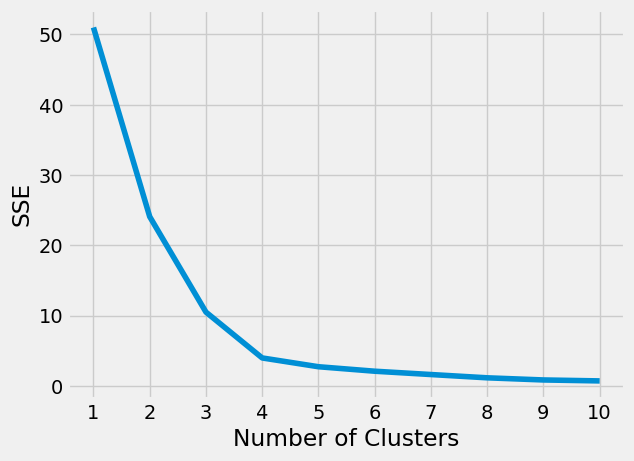

In [108]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [109]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [63]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan.fit(scaled_features)

DBSCAN(min_samples=4)

In [64]:
dbscan.labels_

array([ 0, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1],
      dtype=int64)

In [65]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(scaled_features)

AgglomerativeClustering(n_clusters=3)

In [67]:
agglomerative.labels_

array([1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0], dtype=int64)

In [70]:
em_gmm = GaussianMixture(n_components=3)
em_gmm_labels=em_gmm.fit_predict(scaled_features)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [73]:
em_gmm_labels

array([0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1], dtype=int64)

In [76]:
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)
agglomerative_silhouette = silhouette_score(scaled_features, agglomerative.labels_).round(2)
em_gmm_silhoutte = silhouette_score(scaled_features, em_gmm_labels).round(2)

In [77]:
kmeans_silhouette

0.58

In [78]:
dbscan_silhouette

0.09

In [79]:
agglomerative_silhouette

0.58

In [80]:
em_gmm_silhoutte

0.58

According to the coefficient K-means, Agglomerative and EM using GMM methods are equally performing good on this data with the selected features and appropriate number of clusters is 4.

Ex.2 Consider the cars dataset (Cars.xlsx, available at LMS system) which provides different characteristics for 406 cars:

Car name
MPG (Miles per gallon, a measure of gas mileage)
Number of cylinders
Displacement of the car (in cubic inches)
Horsepower
Weight
Acceleration
Model (Year)
Origin (Nationality of manufacturer)
Perform various cluster analysis algorithms to the data and compare them. What is an appropriate number of clusters? Explain your answer. Provide an interpretation of the obtained groups of cars.

In [85]:
cars = pd.read_excel(r"C:\Users\Александра\Downloads\Cars.xlsx")

In [86]:
cars

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US


In [87]:
cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [88]:
df = df.drop(columns = df[['Car', 'Origin']])

In [89]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(df)

In [92]:
scaled_features

array([[-0.60195165,  1.47634917,  1.07087561, ...,  0.62010716,
        -1.25708027, -1.58146259],
       [-0.95945951,  1.47634917,  1.48120772, ...,  0.84352182,
        -1.43565781, -1.58146259],
       [-0.60195165,  1.47634917,  1.17584429, ...,  0.53972516,
        -1.61423534, -1.58146259],
       ...,
       [ 1.06641835, -0.86276405, -0.57045283, ..., -0.80903746,
        -1.3999423 ,  1.62356475],
       [ 0.5897412 , -0.86276405, -0.71359194, ..., -0.41894836,
         1.10014317,  1.62356475],
       [ 0.94724906, -0.86276405, -0.72313454, ..., -0.30664998,
         1.38586722,  1.62356475]])

In [93]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_features)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [94]:
kmeans.inertia_

984.4245034677621

In [95]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1,
       0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1,

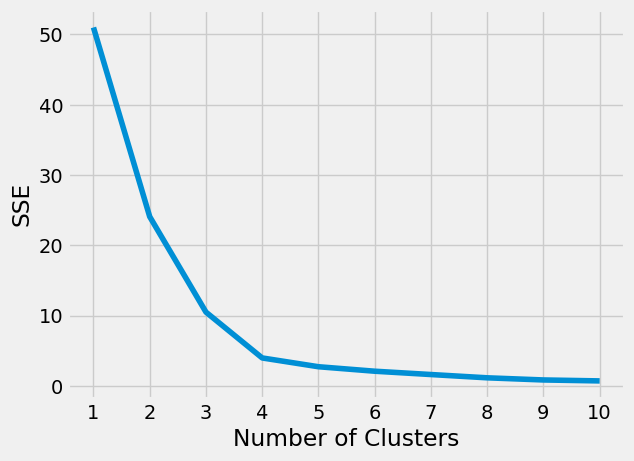

In [107]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [110]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [96]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan.fit(scaled_features)

DBSCAN(min_samples=4)

In [97]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  0,  0,  0,  1, -1, -1,  1, -1, -1,  0, -1, -1, -1,
       -1,  1, -1,  1, -1, -1, -1,  2,  2,  2,  2, -1,  4,  3,  3,  4,  4,
        4, -1, -1,  2,  2,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        1,  3, -1,  3,  3,  5, -1,  3,  3, -1, -1,  3,  3, -1,  3, -1, -1,
       -1, -1,  1, -1,  1,  1, -1, -1,  5,  3,  3,  3, -1, -1,  3,  3, -1,
       -1, -1,  6, -1,  6,  6, -1, -1, -1, -1,  3,  3,  6, -1, -1,  1, -1,
       -1, -1,  1,  3, -1, -1,  1, -1, -1,  5, -1, -1, -1,  6, -1,  6, -1,
       -1, -1, -1, 10,  7,  7,  6,  3,  9,  9, -1,  3,  8,  8,  8, -1, -1,
        8,  8,  8, 11,  1,  8,  6,  6, -1, -1, -1,  9,  9,  9, -1,  7,  7,
        7,  6, -1, -1,  8, 10,  6, -1, -1,  8, 10, -1,  8,  6, 11, 10, 11,
       -1, -1,  8,  8, 11,  8,  8, 12, 12, -1, 12, -1, -1, -1, -1, -1, -1,
        8, -1, 13, -1,  6, -1, -1,  8,  8, -1, -1, 12, -1, -1, -1, -1, -1,
       -1, -1, -1,  8, -1

In [98]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(scaled_features)

AgglomerativeClustering(n_clusters=3)

In [99]:
agglomerative.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0,
       1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1,
       2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [100]:
em_gmm = GaussianMixture(n_components=3)
em_gmm_labels=em_gmm.fit_predict(scaled_features)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [101]:
em_gmm_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0,
       1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [111]:
mshift = MeanShift()
mshift.fit(scaled_features)

MeanShift()

In [112]:
mshift.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [102]:
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)
agglomerative_silhouette = silhouette_score(scaled_features, agglomerative.labels_).round(2)
em_gmm_silhoutte = silhouette_score(scaled_features, em_gmm_labels).round(2)

In [103]:
kmeans_silhouette

0.35

In [104]:
dbscan_silhouette 

-0.21

In [105]:
agglomerative_silhouette

0.34

In [106]:
em_gmm_silhoutte

0.33

According to the coefficient K-means methods is the best performing methhod on this data with the selected features and appropriate number of clusters is 4.